# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn import preprocessing

# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
# Import them from sklearn.metrics. 
from sklearn import metrics
print(os.getcwd())

C:\Users\adrey\Google Drive\Springboard\mySpringboardRepo\Guided Capstone


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [2]:
#Reload the csv file from step 3 and drop columns state and summit_elev
df=pd.read_csv('data/step3_output.csv', index_col=0).drop(columns=['state'])
#.drop(columns=['state', 'summit_elev', 'clusters'])

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df['AdultWeekend'] 

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)
print('explained_variance_score',explained_variance_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print('The mean for Adult Weekend price', lm.intercept_)
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'], ascending=False).head(10)

explained_variance_score 0.9340088609465885
mean_absolute_error 5.218847346150372
The mean for Adult Weekend price 64.06847422276748


,Coefficient
AdultWeekday,19.820836
clusters,5.321214
summit_elev,4.122874
Runs,1.647024
triple,1.397253
surface,1.357573
averageSnowfall,1.167720
vertical_drop,1.106113
quad,1.003894
fastQuads,1.001627


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [3]:
dfbm=df[df['Name'].str.contains('Big Mountain')]
dfall=df[~df['Name'].str.contains('Big Mountain')]
df[df['Name'].str.contains('Big Mountain')]

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,6817,2353,0,0.0,0,3,2,6,0,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [4]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df['AdultWeekend'] 

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Set up test and train
bmindex=df[df['Name'].str.contains('Big Mountain')].index #Big Mountain Row number
X_test=X_scaled[bmindex] #scaled data for Big Mountain
#X_train=np.delete(X_scaled, bmindex, axis=0) #the rest of the data as the train set
X_train=X_scaled #using the whole dataset as the train set
y_test=y[bmindex] #test
#y_train=np.delete(y, bmindex) #train test data (ticket prices)
y_train=y #train test data (ticket prices)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)
print('explained_variance_score',explained_variance_score(y_test,y_pred))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print('The mean for Adult Weekend price', lm.intercept_)
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'], ascending=False)

explained_variance_score 1.0
mean_absolute_error 6.6019165588513715
The mean for Adult Weekend price 64.16681003584229


,Coefficient
AdultWeekday,19.950325
clusters,5.561890
summit_elev,3.736969
fastQuads,1.211838
vertical_drop,1.166004
surface,1.156293
daysOpenLastYear,1.037654
triple,0.982265
NightSkiing_ac,0.930313
Runs,0.901810


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [5]:
y_pred

array([87.60191656])

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [6]:
df[df['Name'].str.contains('Big Mountain')][['Name','AdultWeekend']]

,Name,AdultWeekend
151,Big Mountain Resort,81.0


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

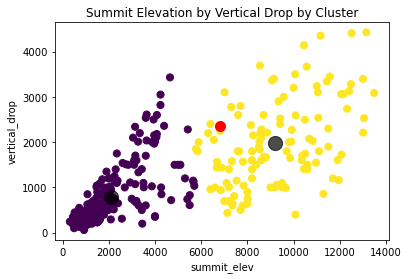

In [7]:
from sklearn.cluster import KMeans
x = df.drop(['Name'], axis =1).values
kmeans3 = KMeans(n_clusters=2)
y_kmeans3 = kmeans3.fit_predict(x)
centers = kmeans3.cluster_centers_

plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);
plt.scatter(dfbm['summit_elev'], dfbm['vertical_drop'], c='red', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('Summit Elevation by Vertical Drop by Cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

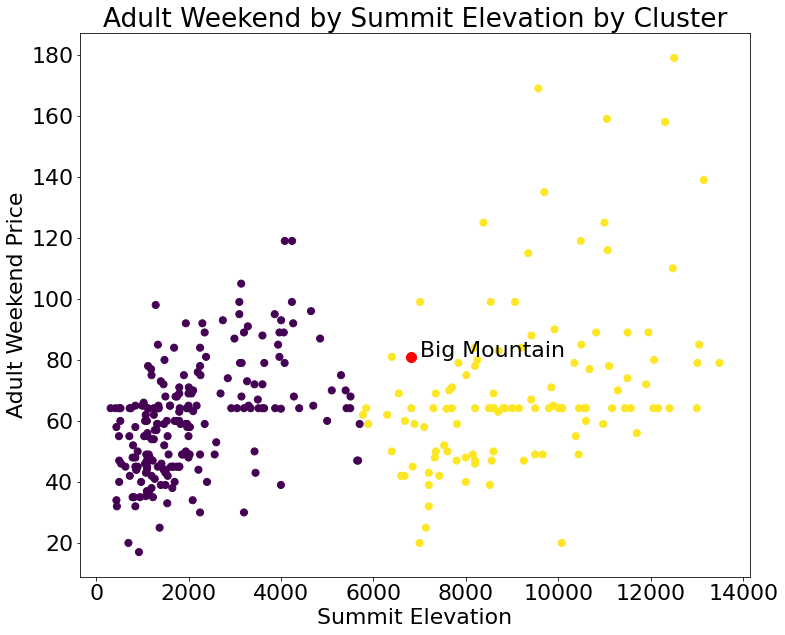

In [8]:
from sklearn.cluster import KMeans
x = df.drop(['Name'], axis =1).values
kmeans3 = KMeans(n_clusters=2)
y_kmeans3 = kmeans3.fit_predict(x)
centers = kmeans3.cluster_centers_

plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 22})

plt.scatter(df['summit_elev'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(centers[:, 0]/100, centers[:, 1]/100, c='black', s=200, alpha=0.7).autoscale;
plt.scatter(dfbm['summit_elev'], dfbm['AdultWeekend'], c='red', s=100)
plt.annotate('Big Mountain', (dfbm['summit_elev']+200, dfbm['AdultWeekend']))
#plt.xticks(dfbm['summit_elev'], dfbm['AdultWeekend'], label='Big Mountain')
plt.xlabel('Summit Elevation')
plt.ylabel('Adult Weekend Price')
plt.title('Adult Weekend by Summit Elevation by Cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

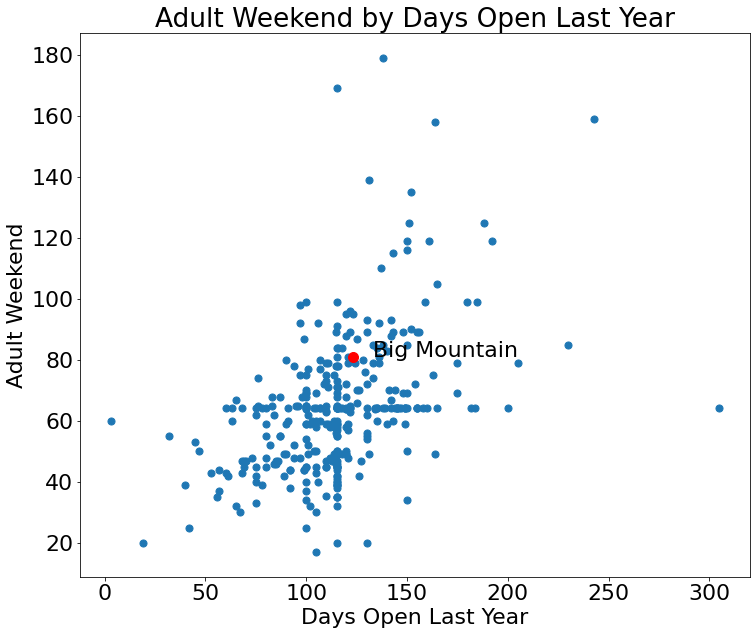

In [9]:
from sklearn.cluster import KMeans
x = df.drop(['Name'], axis =1).values
kmeans3 = KMeans(n_clusters=2)
y_kmeans3 = kmeans3.fit_predict(x)
centers = kmeans3.cluster_centers_

plt.figure(figsize=(12,10))
#plt.rcParams.update({'font.size': 22})

plt.scatter(df['daysOpenLastYear'], df['AdultWeekend'], s=50)
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);
plt.annotate('Big Mountain', (dfbm['daysOpenLastYear']+10, dfbm['AdultWeekend']))
plt.scatter(dfbm['daysOpenLastYear'], dfbm['AdultWeekend'], c='red', s=100)
plt.xlabel('Days Open Last Year')
plt.ylabel('Adult Weekend')
plt.title('Adult Weekend by Days Open Last Year')
plt.savefig('figures/fig1.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [10]:
import pickle
s = pickle.dumps(model)


from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [11]:
coefdf=pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by=['Coefficient'], ascending=False)
coefdf=coefdf.append(pd.DataFrame(explained_variance_score(y_test,y_pred),['explained_variance_score'], columns=['Coefficient']))
coefdf=coefdf.append(pd.DataFrame(mean_absolute_error(y_test,y_pred),['mean_absolute_error'], columns=['Coefficient']))
coefdf=coefdf.append(pd.DataFrame(lm.intercept_,['lm.intercept'], columns=['Coefficient']))
# Write dataframe to csv 
coefdf.to_csv('data/ModelCoefficients.csv')


In [12]:
coefdf

,Coefficient
AdultWeekday,19.950325
clusters,5.561890
summit_elev,3.736969
fastQuads,1.211838
vertical_drop,1.166004
surface,1.156293
daysOpenLastYear,1.037654
triple,0.982265
NightSkiing_ac,0.930313
Runs,0.901810
